# Predict Students' Dropout and Academic Success

**For what purpose was the dataset created?**

The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. 


**Dataset Overview**

* The dataset has `4424` instances and `36` features.

* The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors. 

* The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course.

You can get more information about features from https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success




## Data Preparation 

### Import necessary libraries

In [1]:
# For data exploration and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For modelling
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.metrics import precision_recall_curve,roc_curve,RocCurveDisplay,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings



### Load the data

In [2]:
df = pd.read_csv('data.csv',sep=';')

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
pd.set_option('display.max_columns',37)

In [5]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Quick review of data

In [6]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

Let's change some column names, because they are complex,long and hold additional space.

In [7]:
df.columns = ['MaritalStat', 'AppMode', 'AppOrder', 'Course', 
              'DayEvenAttend', 'PrevQual', 'PrevQualGrade', 'Nationality', 
              'MotherQual', 'FatherQual', 'MotherOcc', 'FatherOcc', 
              'AdmGrade', 'Displaced', 'EduSpecNeeds', 'Debtor', 
              'FeesUpToDate', 'Gender', 'Scholarship', 'AgeEnroll', 'International', 
              'CurrUnits1stCred', 'CurrUnits1stEnroll', 'CurrUnits1stEval', 
              'CurrUnits1stAppr', 'CurrUnits1stGrade', 'CurrUnits1stNoEval', 
              'CurrUnits2ndCred', 'CurrUnits2ndEnroll', 'CurrUnits2ndEval', 
              'CurrUnits2ndAppr', 'CurrUnits2ndGrade', 'CurrUnits2ndNoEval', 
              'UnempRate', 'InflRate', 'GDP', 'Target']

In [8]:
df.head()

,MaritalStat,AppMode,AppOrder,Course,DayEvenAttend,PrevQual,PrevQualGrade,Nationality,MotherQual,FatherQual,MotherOcc,FatherOcc,AdmGrade,Displaced,EduSpecNeeds,Debtor,FeesUpToDate,Gender,Scholarship,AgeEnroll,International,CurrUnits1stCred,CurrUnits1stEnroll,CurrUnits1stEval,CurrUnits1stAppr,CurrUnits1stGrade,CurrUnits1stNoEval,CurrUnits2ndCred,CurrUnits2ndEnroll,CurrUnits2ndEval,CurrUnits2ndAppr,CurrUnits2ndGrade,CurrUnits2ndNoEval,UnempRate,InflRate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
df.shape

(4424, 37)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MaritalStat         4424 non-null   int64  
 1   AppMode             4424 non-null   int64  
 2   AppOrder            4424 non-null   int64  
 3   Course              4424 non-null   int64  
 4   DayEvenAttend       4424 non-null   int64  
 5   PrevQual            4424 non-null   int64  
 6   PrevQualGrade       4424 non-null   float64
 7   Nationality         4424 non-null   int64  
 8   MotherQual          4424 non-null   int64  
 9   FatherQual          4424 non-null   int64  
 10  MotherOcc           4424 non-null   int64  
 11  FatherOcc           4424 non-null   int64  
 12  AdmGrade            4424 non-null   float64
 13  Displaced           4424 non-null   int64  
 14  EduSpecNeeds        4424 non-null   int64  
 15  Debtor              4424 non-null   int64  
 16  FeesUp

Except target variable all variables are numerical.

In [11]:
df.describe()

,MaritalStat,AppMode,AppOrder,Course,DayEvenAttend,PrevQual,PrevQualGrade,Nationality,MotherQual,FatherQual,MotherOcc,FatherOcc,AdmGrade,Displaced,EduSpecNeeds,Debtor,FeesUpToDate,Gender,Scholarship,AgeEnroll,International,CurrUnits1stCred,CurrUnits1stEnroll,CurrUnits1stEval,CurrUnits1stAppr,CurrUnits1stGrade,CurrUnits1stNoEval,CurrUnits2ndCred,CurrUnits2ndEnroll,CurrUnits2ndEval,CurrUnits2ndAppr,CurrUnits2ndGrade,CurrUnits2ndNoEval,UnempRate,InflRate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [12]:
df.duplicated().sum()

0

There is no duplicate values.

In [13]:
df.isnull().sum().sort_values()

MaritalStat           0
International         0
CurrUnits1stCred      0
CurrUnits1stEnroll    0
CurrUnits1stEval      0
CurrUnits1stAppr      0
CurrUnits1stGrade     0
CurrUnits1stNoEval    0
CurrUnits2ndCred      0
CurrUnits2ndEnroll    0
CurrUnits2ndEval      0
CurrUnits2ndAppr      0
CurrUnits2ndGrade     0
CurrUnits2ndNoEval    0
UnempRate             0
InflRate              0
AgeEnroll             0
GDP                   0
Scholarship           0
FeesUpToDate          0
AppMode               0
AppOrder              0
Course                0
DayEvenAttend         0
PrevQual              0
PrevQualGrade         0
Nationality           0
MotherQual            0
FatherQual            0
MotherOcc             0
FatherOcc             0
AdmGrade              0
Displaced             0
EduSpecNeeds          0
Debtor                0
Gender                0
Target                0
dtype: int64

That's so good, there is no missing values.

Let's look at distribution of values in each column.

In [14]:
for i in df.columns:
  print(df[i].value_counts())
  print()

MaritalStat
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

AppMode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64

AppOrder
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64

Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64

DayEvenAttend
1    3941
0     483
Name: count, dtype: int64

PrevQual
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, dtype: int64

PrevQualGrade
133.1    491
130

### Unique Value Analysis

In [15]:
for i in df.columns:
  print(f'{i} : {df[i].nunique()}')

MaritalStat : 6
AppMode : 18
AppOrder : 8
Course : 17
DayEvenAttend : 2
PrevQual : 17
PrevQualGrade : 101
Nationality : 21
MotherQual : 29
FatherQual : 34
MotherOcc : 32
FatherOcc : 46
AdmGrade : 620
Displaced : 2
EduSpecNeeds : 2
Debtor : 2
FeesUpToDate : 2
Gender : 2
Scholarship : 2
AgeEnroll : 46
International : 2
CurrUnits1stCred : 21
CurrUnits1stEnroll : 23
CurrUnits1stEval : 35
CurrUnits1stAppr : 23
CurrUnits1stGrade : 805
CurrUnits1stNoEval : 11
CurrUnits2ndCred : 19
CurrUnits2ndEnroll : 22
CurrUnits2ndEval : 30
CurrUnits2ndAppr : 20
CurrUnits2ndGrade : 786
CurrUnits2ndNoEval : 10
UnempRate : 10
InflRate : 9
GDP : 10
Target : 3


## Exploratory Data Analysis

### Distribution of Target Value

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9148\577717539.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df,x='Target',palette='mako')


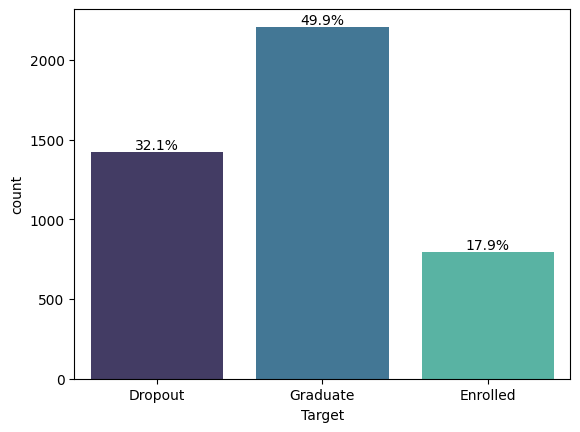

In [16]:
ax = sns.countplot(df,x='Target',palette='mako')

total = df['Target'].count()

for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')


plt.show()

### Relation between categorical variables and target variable

In [17]:
df.columns

Index(['MaritalStat', 'AppMode', 'AppOrder', 'Course', 'DayEvenAttend',
       'PrevQual', 'PrevQualGrade', 'Nationality', 'MotherQual', 'FatherQual',
       'MotherOcc', 'FatherOcc', 'AdmGrade', 'Displaced', 'EduSpecNeeds',
       'Debtor', 'FeesUpToDate', 'Gender', 'Scholarship', 'AgeEnroll',
       'International', 'CurrUnits1stCred', 'CurrUnits1stEnroll',
       'CurrUnits1stEval', 'CurrUnits1stAppr', 'CurrUnits1stGrade',
       'CurrUnits1stNoEval', 'CurrUnits2ndCred', 'CurrUnits2ndEnroll',
       'CurrUnits2ndEval', 'CurrUnits2ndAppr', 'CurrUnits2ndGrade',
       'CurrUnits2ndNoEval', 'UnempRate', 'InflRate', 'GDP', 'Target'],
      dtype='object')

#### Marital Status and Course Outcome

In [18]:
df['MaritalStat'].value_counts()

MaritalStat
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

1 – single,
2 – married,
3 – widower, 
4 – divorced,
5 – facto union, 
6 – legally separated

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9148\2054529157.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9148\2054529157.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


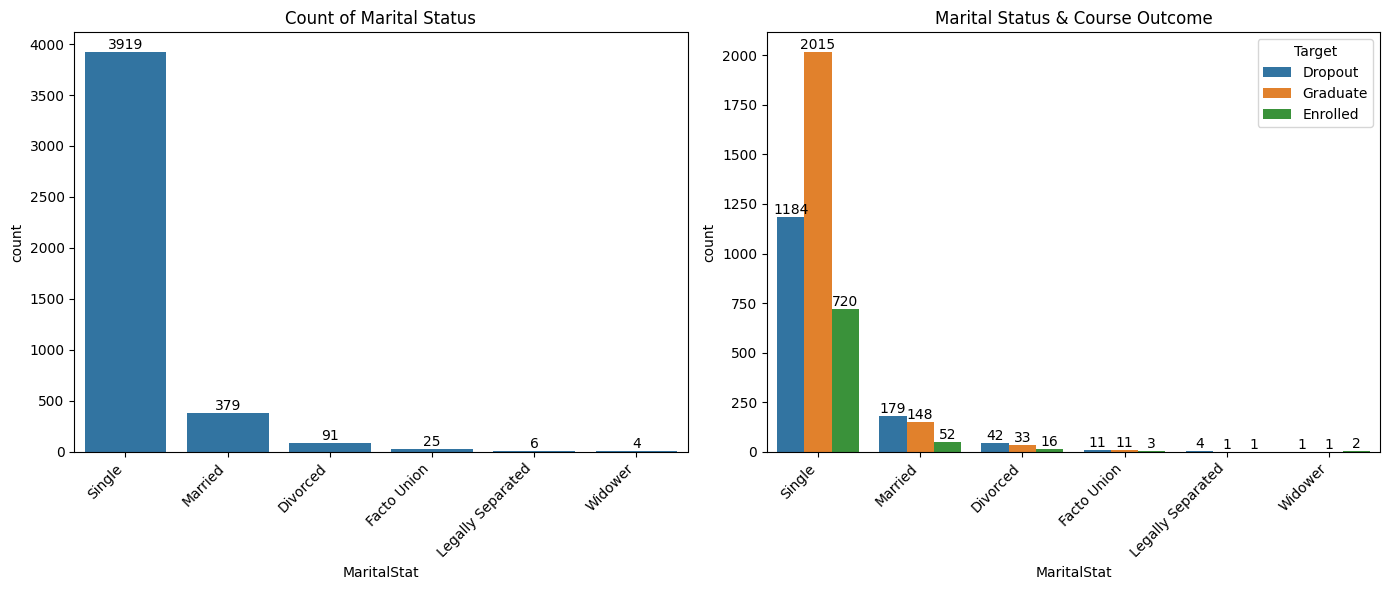

In [61]:
mar_stat_map = {1:'Single',2:'Married',3:'Widower',4: 'Divorced',5:'Facto Union',6:'Legally Separated'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=df['MaritalStat'].map(mar_stat_map),
              order = df['MaritalStat'].map(mar_stat_map).value_counts().index,
              ax=ax1)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title('Count of Marital Status')

for c in ax1.containers:
    ax1.bar_label(c)


sns.countplot(x=df['MaritalStat'].map(mar_stat_map),
              order = df['MaritalStat'].map(mar_stat_map).value_counts().index,
              hue=df['Target'],
              ax=ax2)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title('Marital Status & Course Outcome')

for c in ax2.containers:
    ax2.bar_label(c)

plt.tight_layout()
plt.show()


**Analysis**: 

* Generally, students are single. Few of them is married and divorced.
* The half of the single students graduated, married students are more likely to drop out.
* Other marital statuses (Divorced, Facto Union, Legally Separated, Widower) have very small sample sizes, which limits strong conclusions but indicates a similar trend as the larger groups.

#### Application Mode and Course Outcome

In [52]:
df['AppMode'].value_counts()

AppMode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64

1 - 1st phase - general contingent, 2 - Ordinance No. 612/93, 5 - 1st phase - special contingent (Azores Island),7 - Holders of other higher courses,10 - Ordinance No. 854-B/99, 15 - International student (bachelor), 16 - 1st phase - special contingent (Madeira Island), 17 - 2nd phase - general contingent, 18 - 3rd phase - general contingent, 26 - Ordinance No. 533-A/99, item b2 (Different Plan),27 - Ordinance No. 533-A/99, item b3 (Other Institution), 39 - Over 23 years old, 42 - Transfer, 43 - Change of course, 44 - Technological specialization diploma holders, 51 - Change of institution/course, 53 - Short cycle diploma holders, 57 - Change of institution/course (International)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9148\712340700.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9148\712340700.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


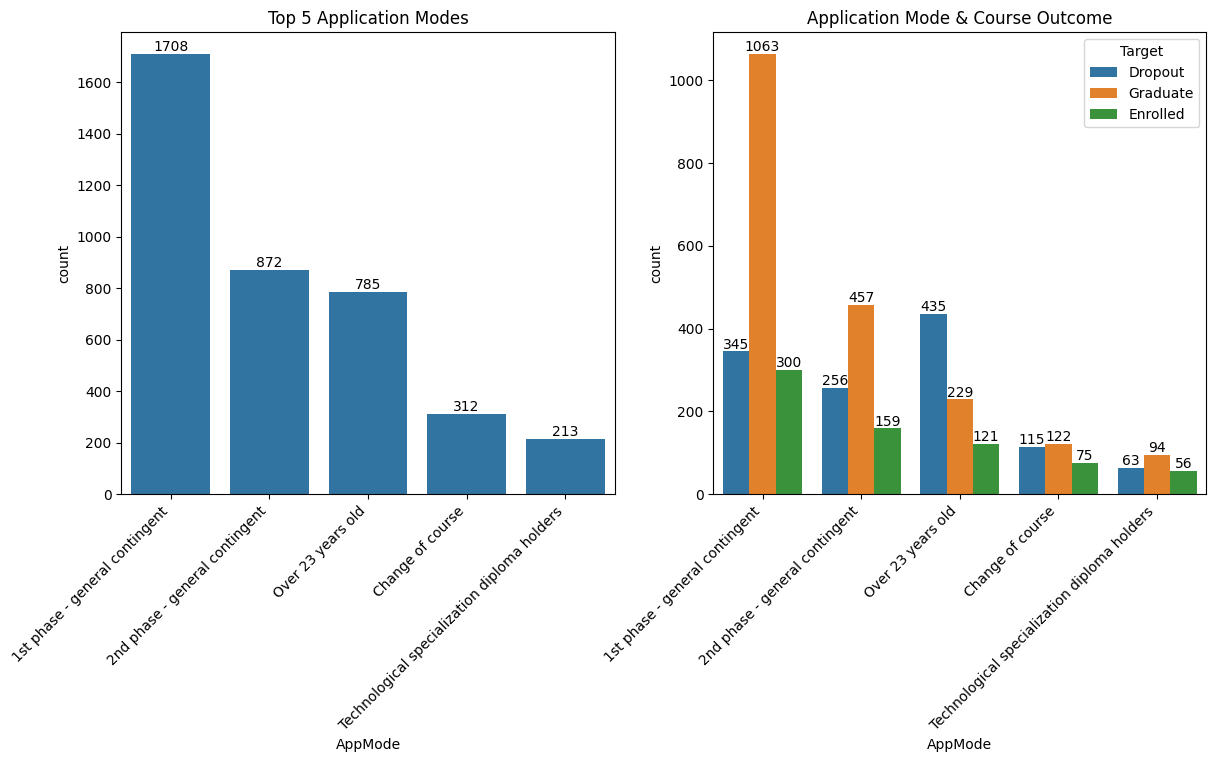

In [65]:
app_mode_map = {1: '1st phase - general contingent', 2 : 'Ordinance No. 612/93', 5:'1st phase - special contingent (Azores Island)',
                7: 'Holders of other higher courses',10 : 'Ordinance No. 854-B/99',
                15: 'International student (bachelor)',16: '1st phase - special contingent (Madeira Island)',
                17: '2nd phase - general contingent', 18: '3rd phase - general contingent',
                26: 'Ordinance No. 533-A/99, item b2) (Different Plan)', 27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
                39: 'Over 23 years old', 42: 'Transfer', 43: 'Change of course', 44: 'Technological specialization diploma holders',
                51: 'Change of institution/course', 53: 'Short cycle diploma holders',57: 'Change of institution/course (International)'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1 = sns.countplot(x=df['AppMode'].map(app_mode_map),
              order = df['AppMode'].map(app_mode_map).value_counts().index[:5],
              ax=ax1)

for c in ax1.containers:
    ax1.bar_label(c)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title('Top 5 Application Modes')


ax2 = sns.countplot(x=df['AppMode'].map(app_mode_map),
              order = df['AppMode'].map(app_mode_map).value_counts().index[:5],
              hue=df['Target'],
              ax=ax2)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title('Application Mode & Course Outcome')

for container in ax2.containers:
    ax2.bar_label(container)


plt.show()


**Analysis**:

* The 1st phase - general contingent is clearly the most successful both in terms of the number of applications and the number of graduates. Early applicants might have more flexibility in choosing programs that best align with their skills and goals, leading to higher satisfaction and lower dropout rates.
* In the 2nd phase - general contingent the number of graduated students are more than others, but dropped out students is not low. The students in the 2nd phase might not have performed as well in earlier stages (e.g., lower test scores, grades), leading to more academic struggles and dropouts.
* Over 23 Years Old: has moderate graduation but high dropout.Older students may have additional responsibilities such as jobs or families, making it harder for them to fully commit to their studies, which could explain the higher dropout rates.
* In other categories the numbers is so close to each other.

#### Application Order and Course Outcome

In [67]:
df['AppOrder'].value_counts()

AppOrder
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64

Application order (between 0 - first choice; and 9 last choice)

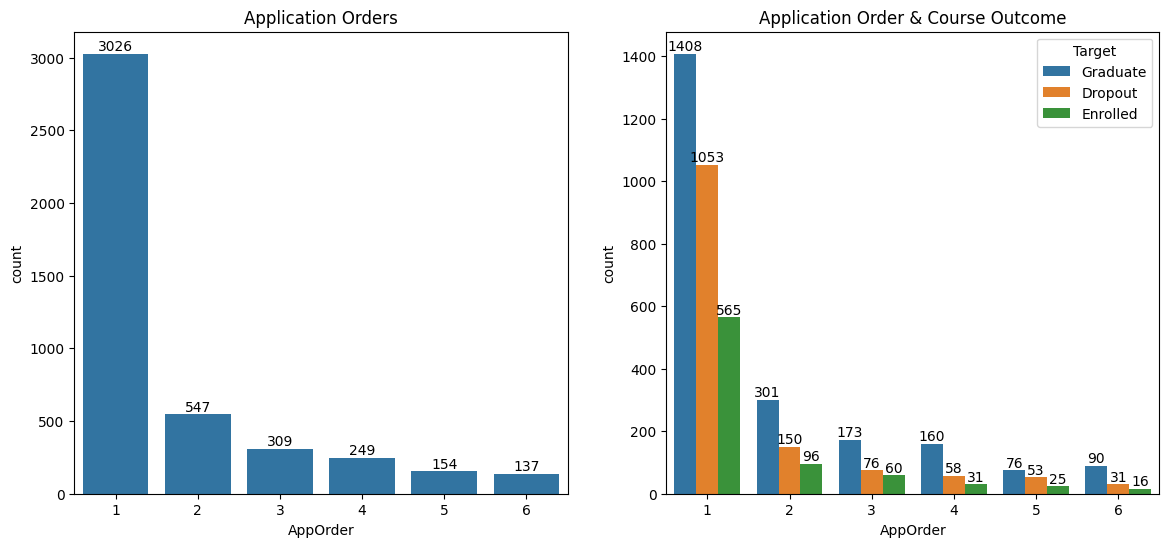

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1 = sns.countplot(x=df['AppOrder'],
              order = df['AppOrder'].value_counts().index[:6],
              ax=ax1)

for c in ax1.containers:
    ax1.bar_label(c)

ax1.set_title('Application Orders')


ax2 = sns.countplot(x=df['AppOrder'],
              order = df['AppOrder'].value_counts().index[:6],
              hue=df['Target'],
              ax=ax2)


ax2.set_title('Application Order & Course Outcome')

for container in ax2.containers:
    ax2.bar_label(container)


plt.show()


**Analysis**:
* A significant majority of students applied with their first choice. As the application order increases (from 2 to 6), the number of applications drops sharply.

* First Choice = Better Motivation and Fit: The high number of graduates for students in their first choice indicates that students are more likely to succeed when placed in a program they are most passionate about.
* Dropouts in First Choice: The large number of dropouts among first-choice students might be due to external factors, such as unexpected academic challenges or personal issues, despite being in a preferred program.
* From 2 to 6 most of students are graduated, but there are enough students which had dropped out.

#### Course and Outcome

In [70]:
df['Course'].value_counts()

Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9148\3640261791.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9148\3640261791.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


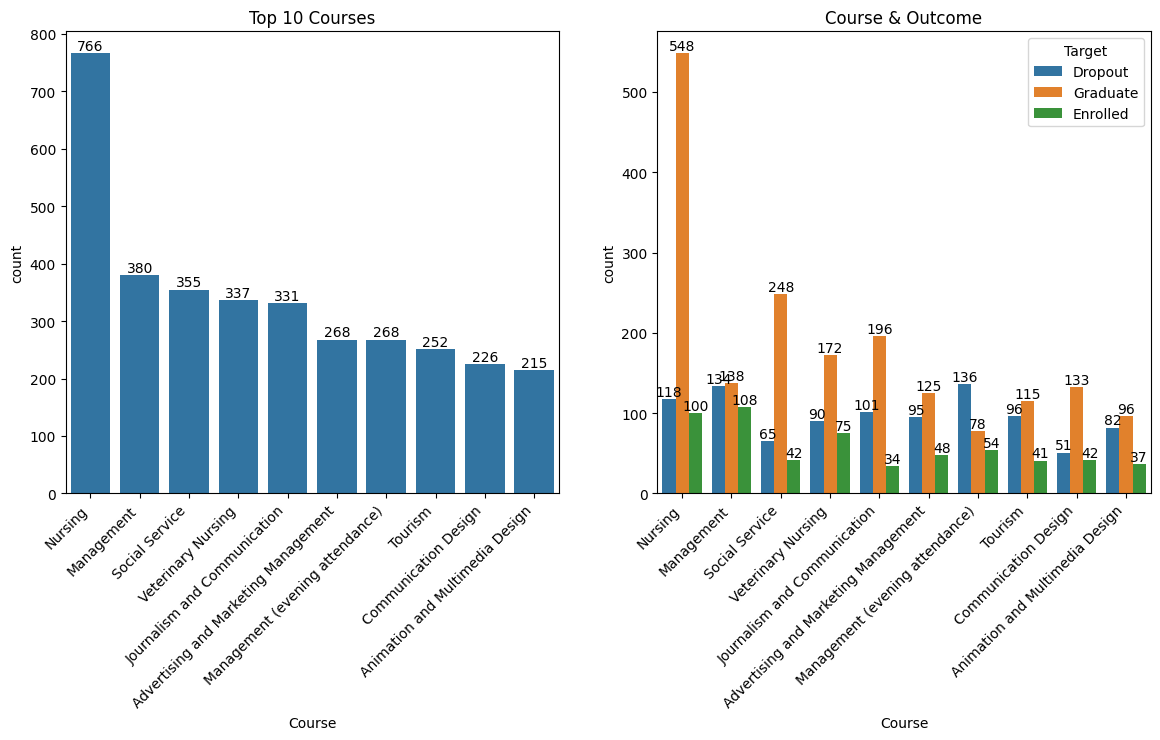

In [72]:
course_map = {33:'Biofuel Production Technologies', 171: 'Animation and Multimedia Design', 8014: 'Social Service (evening attendance)' ,
              9003:'Agronomy', 9070:'Communication Design',9085:'Veterinary Nursing',9119:'Informatics Engineering',
              9130:'Equinculture', 9147:'Management', 9238:'Social Service', 9254:'Tourism', 9500:'Nursing',9556:'Oral Hygiene',
              9670:'Advertising and Marketing Management', 9773:'Journalism and Communication',
              9853:'Basic Education', 9991:'Management (evening attendance)'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1 = sns.countplot(x=df['Course'].map(course_map),
              order = df['Course'].map(course_map).value_counts().index[:10],
              ax=ax1)

for c in ax1.containers:
    ax1.bar_label(c)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title('Top 10 Courses')


ax2 = sns.countplot(x=df['Course'].map(course_map),
              order = df['Course'].map(course_map).value_counts().index[:10],
              hue=df['Target'],
              ax=ax2)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title('Course & Outcome')

for container in ax2.containers:
    ax2.bar_label(container)


plt.show()


**Analysis**
* Nursing is the most popular choice, indicating a strong interest in healthcare-related education, likely due to stable job opportunities and demand in the healthcare sector.
* Management and Social Service are also in demand, suggesting interest in leadership roles and community-focused careers.
* Generally, in majority of courses graduation rates is high. But in courses related with management students are more likely to dropout.
Management courses often have higher dropout rates due to misaligned expectations, academic pressure, and the challenging balance between studies and professional responsibilities.

#### Daytime/evening attendance and Course Outcome

In [73]:
df['DayEvenAttend'].value_counts()

DayEvenAttend
1    3941
0     483
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9148\114753405.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9148\114753405.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


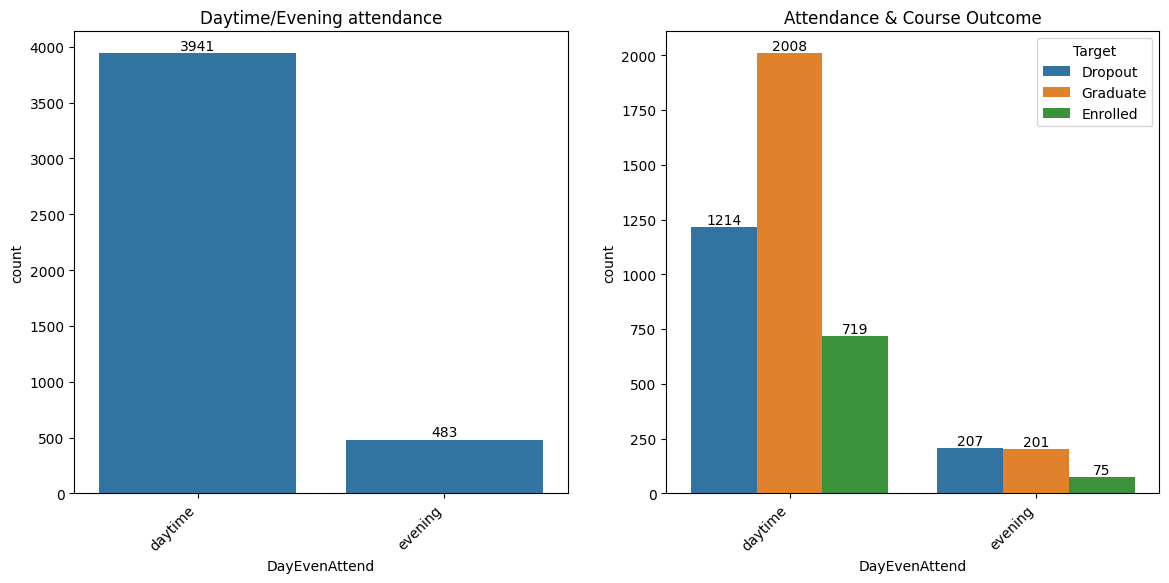

In [75]:
attend_map = {1:'daytime', 0:'evening'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1 = sns.countplot(x=df['DayEvenAttend'].map(attend_map),
              ax=ax1)

for c in ax1.containers:
    ax1.bar_label(c)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title('Daytime/Evening attendance')


ax2 = sns.countplot(x=df['DayEvenAttend'].map(attend_map),
                    hue=df['Target'],
                    ax=ax2)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title('Attendance & Course Outcome')

for container in ax2.containers:
    ax2.bar_label(container)


plt.show()

**Analysis**
* Most of students attend in daytime, and majority of them are graduated.
* Students which attend in evening have the same proportion of dropout and graduation rates.